**Цель работы:** изучение алгоритмов кластеризации, приобретение навыков оценки качества разбиения данных на кластеры и интерпретации результатов.

**Постановка задачи:**
1. Загрузить датасет для задачи кластеризации / классификации (например, с платформы Kaggle). Провести дескриптивный анализ данных: определить размерность, типы признаков, наличие пропусков. Оценить распределение переменных (близость к нормальному) с использованием визуализации (гистограммы). Проверить условие применения кластеризации: отсутствие классов, осмысленность кластеризации, отсутствие выбросов.
2. Выполнить стандартизацию / нормализацию числовых признаков. Обосновать выбор метода масштабирования. Построить матрицу диаграмм рассеивания для визуальной оценки структуры данных, предположительного количества кластеров и типа кластерной структуры. Аргументировать выбор методов кластеризации на основе формы, размера и плотности кластеров.
3. Реализовать кластеризацию двумя различными методами на выбор: K-means (K-средних); иерархическая кластеризация; DBSCAN; EM-алгоритм (Gaussian Mixture). Для методов, требующих задания числа кластеров (K-means, иерархическая), подобрать оптимальное значение k с использованием: метода локтя и / или анализа силуэта.
4. Рассчитать метрики качества для обоих методов: внутренние и внешние. Оценить расстояние между кластерами, внутрикластерные расстояния, компактность кластеров, центры кластеров. Опционально, если известно разделение на классы, посчитать: индекс Rand, индекс Жаккара и др. внешние метрики. Привести содержательную интерпретацию полученных значений.
5. Исследовать влияние параметров одного из методов (например, ε и min_samples для DBSCAN или количества кластеров k для K-means) на качество кластеризации.
6. Визуализировать полученные кластеры в пространстве признаков (использовать PCA для снижения размерности при необходимости). Проанализировать центры кластеров (для K-means) и дать содержательную интерпретацию выделенных групп. Сравнить результаты, полученные двумя разными методами.

**Описание датасета:** Для лабораторной работы был выбран датасет Кластеризация видов пингвинов (Clustering Penguins Species), в котором содержатся следующие признаки:
- culmen_length_mm, длина клюва, числовой признак, единица измерения: мм;
- culmen_depth_mm, высота надклювья, числовой признак, единица измерения: мм;
- flipper_length_mm, длина ласт, числовой признак, единица измерения: мм;
- body_mass_g, масса тела, числовой признак, единица измерения: гр;
- sex, пол, категориальный признак.

В данных нет меток класса, датасет предназначен именно для кластеризации.<br>
Виды пингвинов различаются по представленным критериям, поэтому кластеризация осмысленна.

In [358]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist

df_with_class = pd.read_csv('penguins_full.csv')

df = df_with_class.drop(columns=['species'])

print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
print(df.head())


Размер датасета: (344, 5)

Первые 5 строк:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    male
1              39.5             17.4              186.0       3800.0  female
2              40.3             18.0              195.0       3250.0  female
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  female


In [359]:
print('Количество пропущенных значений:\n', df.isnull().sum())

Количество пропущенных значений:
 culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


Пропущенные значения составляют не более 5% данных (примерно 2.6 %), следовательно, их можно просто удалить.

In [360]:
df = df.dropna(subset=['culmen_length_mm', 'culmen_depth_mm', 
                        'flipper_length_mm', 'body_mass_g'])

df = df.dropna(subset=['sex'])

print('Проверка пропущенных значений:\n', df.isnull().sum())

df_with_class = df_with_class.dropna(subset=['culmen_length_mm', 'culmen_depth_mm', 
                                             'flipper_length_mm', 'body_mass_g'])
df_with_class = df_with_class.dropna(subset=['sex'])

print('Проверка пропущенных значений:\n', df_with_class.isnull().sum())

Проверка пропущенных значений:
 culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
Проверка пропущенных значений:
 species              0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


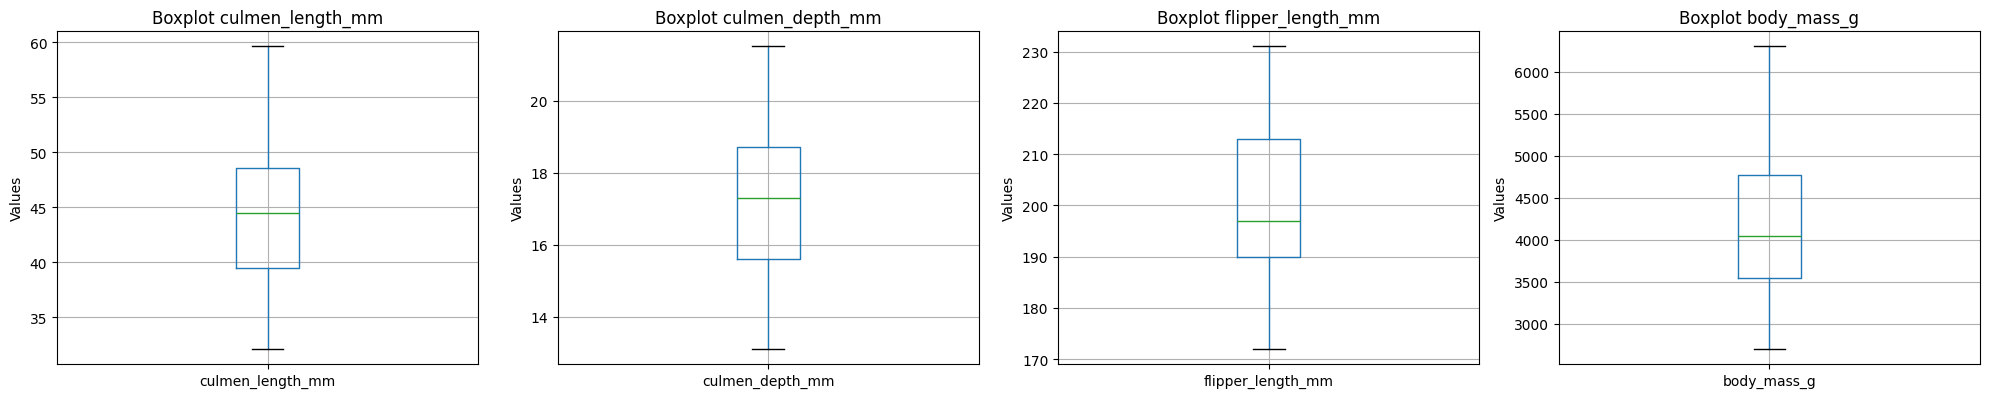

In [361]:
features = df.columns[:4]
n_features = len(features)

fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.ravel()

for i, feature in enumerate(features):
    if i < len(axes):
        df.boxplot(column=feature, ax=axes[i])
        axes[i].set_title(f'Boxplot {feature}')
        axes[i].set_ylabel('Values')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

В результате построения ящиков с усами можно заметить, что признак flipper_length_mm содержит выбросы. Можно попробовать избавиться от них, ограничив диапазон данных.

In [ ]:
#print(df[df["flipper_length_mm"] > 4000])
#print(df[df["flipper_length_mm"] < 0])

Empty DataFrame
Columns: [culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Empty DataFrame
Columns: [culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


В flipper_length_mm всего 2 выброса, поэтому, действительно, можно просто исключить их.

In [363]:
# df = df.drop([9, 14])

print("Размер датасета:", df.shape)

Размер датасета: (333, 5)


В результате предобработки данных размер датасета сократился с 344 до 333 (на 3.2%), что вполне приемлемо.

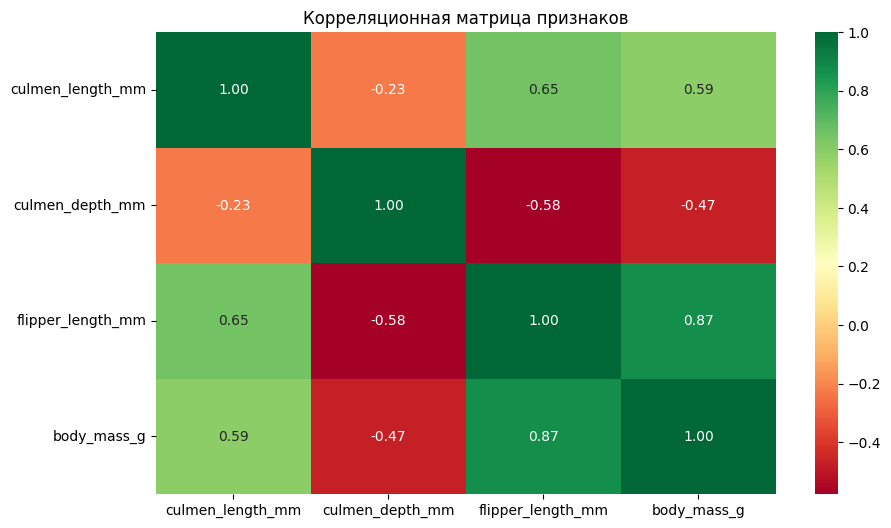

In [364]:
numerical_features = ['culmen_length_mm', 'culmen_depth_mm', 
                     'flipper_length_mm', 'body_mass_g']

plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Корреляционная матрица признаков")
plt.show()

In [365]:
numerical_features2 = ['culmen_length_mm', 'culmen_depth_mm', 
                       'body_mass_g']

print("Дескриптивный анализ:")

summary = pd.DataFrame({
    "Среднее": df[numerical_features2].mean(numeric_only=True),
    "Медиана": df[numerical_features2].median(numeric_only=True),
    "Мода": df[numerical_features2].mode().iloc[0],
    "Ст. отклонение": df[numerical_features2].std(numeric_only=True),
    "Мин": df[numerical_features2].min(),
    "Макс": df[numerical_features2].max()
})

print(summary.round(2))

Дескриптивный анализ:
                  Среднее  Медиана    Мода  Ст. отклонение     Мин    Макс
culmen_length_mm    43.99     44.5    41.1            5.47    32.1    59.6
culmen_depth_mm     17.16     17.3    17.0            1.97    13.1    21.5
body_mass_g       4207.06   4050.0  3800.0          805.22  2700.0  6300.0


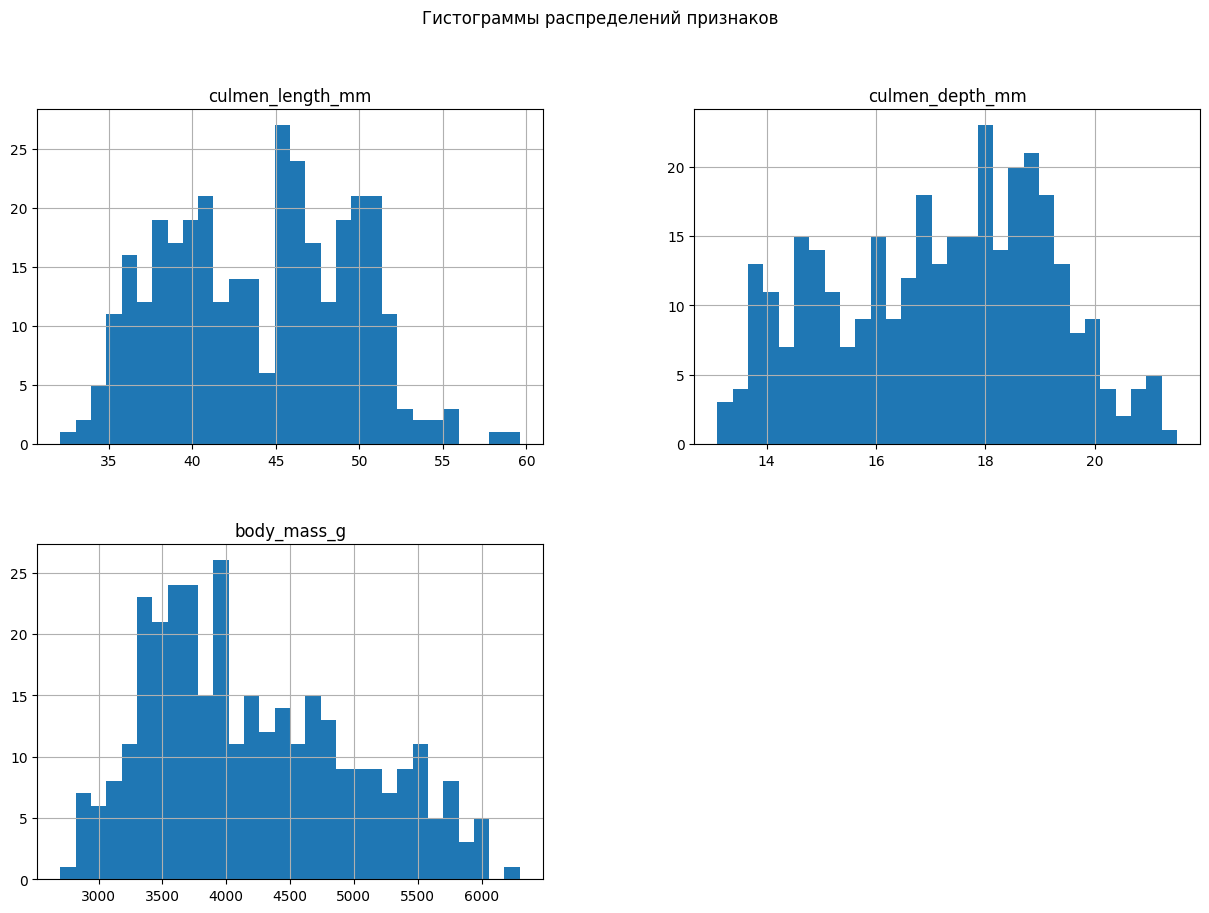

In [366]:
df[numerical_features2].hist(bins=30, figsize=(15, 10))
plt.suptitle("Гистограммы распределений признаков")
plt.show()

Распределения признаков не согласуются с нормальным, кроме того, признаки представлены в разных единицах измерения, поэтому необходимо применить стандартизацию.

In [367]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_features2])
df_scaled = pd.DataFrame(X_scaled, columns=df[numerical_features2].columns)

print("Статистика после обработки:")
print(df_scaled.describe().round(2))

Статистика после обработки:
       culmen_length_mm  culmen_depth_mm  body_mass_g
count            333.00           333.00       333.00
mean              -0.00            -0.00        -0.00
std                1.00             1.00         1.00
min               -2.18            -2.07        -1.87
25%               -0.82            -0.80        -0.82
50%                0.09             0.07        -0.20
75%                0.84             0.78         0.71
max                2.86             2.20         2.60


<Figure size 2000x2000 with 0 Axes>

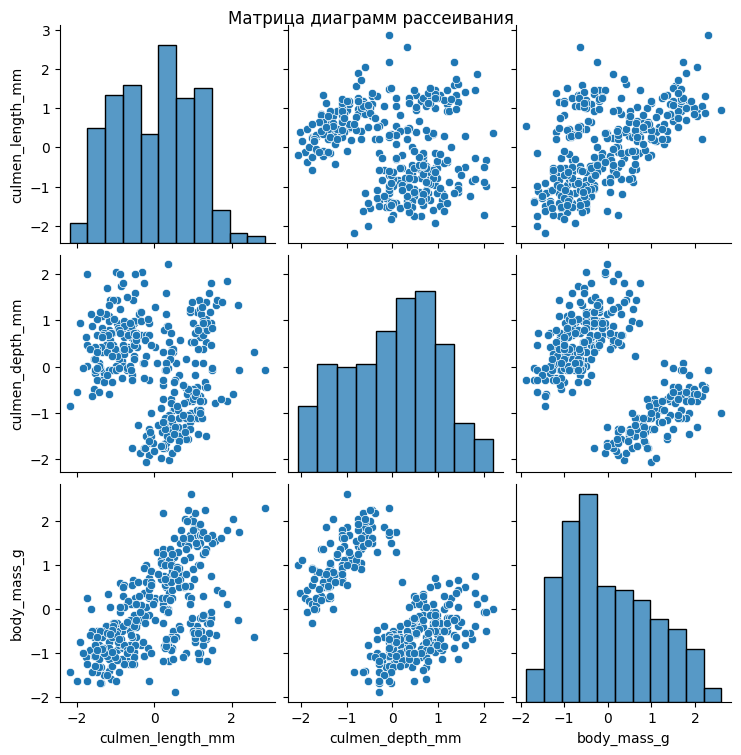

In [ ]:
plt.figure(figsize=(20, 20))
sns.pairplot(df_scaled)
plt.suptitle('Матрица диаграмм рассеивания', y=1)
plt.show()

По диаграммам рассеивания можно предположить, что оптимальное количество кластеров - 2-3, но третий кластер совсем небольшой и почти сливается с остальными.<br>
На диаграммах с двумя кластерами можно заметить, что они слегка вытянутые, напоминают овалы.<br>
На диаграммах с тремя кластерами похоже, что кластеры с центрами накладываются на разреженный фон из редко расположенных объектов.<br>

Можно попробовать использовать метод k-средних, так как данные представляют собой отдельные "облака". Однако эти "облака" немного разного размера и присутствуют обособленные точки, которые могут плохо влиять на работу алгоритма.<br>
Алгоритм GMM, вероятнее, лучше подойдет для датасета, так как он позволяет моделировать кластеры различной формы и справляется с ситуациями, когда границы между кластерами нечеткие.<br>

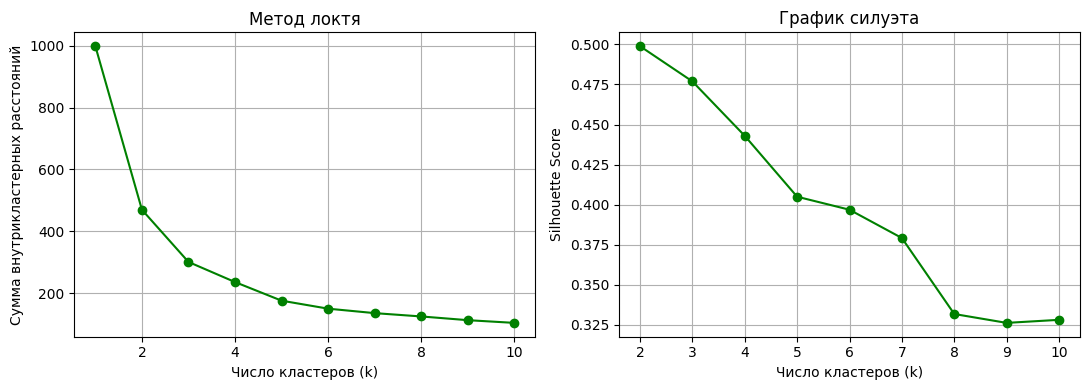

In [369]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(11,4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertia, 'go-')
plt.title("Метод локтя")
plt.xlabel("Число кластеров (k)")
plt.ylabel("Сумма внутрикластерных расстояний")
plt.grid(True)

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, 'go-')
plt.xlabel('Число кластеров (k)')
plt.ylabel('Silhouette Score')
plt.title('График силуэта')
plt.grid(True)
plt.tight_layout()
plt.show()

По методу локтя можно выбрать 2-3 кластера, так как после 3 график изменяется гораздо медленнее.<br>
По графику силуэта видно, что стоит выбрать 2 кластера, так как это ближайшее большое значене, после график убывает.<br>
Таким образом, оптимальным количеством кластеров для k-means будет 2.

Для алгоритма GMM нужно определить параметры n_components и covariance_type.<br>
covariance_type='full' указывает на то, что кластеры имеют разные формы, размеры и ориентацию, что подходит для представленных данных..<br>
Для выбора n_components есть практический метод – построение графика BIC.

Text(0.5, 1.0, 'BIC для выбора числа компонент')

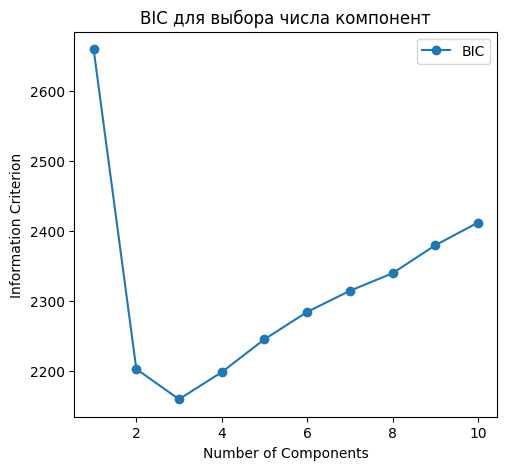

In [370]:
n_components_range = range(1, 11)
bics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
    gmm.fit(X_scaled)
    bics.append(gmm.bic(X_scaled))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(n_components_range, bics, 'o-', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.legend()
plt.title('BIC для выбора числа компонент')

In [371]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

gmm = GaussianMixture(n_components=3, covariance_type='full', n_init=10)
gmm_labels = gmm.fit_predict(X_scaled)

In [ ]:
def calculate_cluster_metrics(X, labels, method_name):
    unique_labels = np.unique(labels)
    metrics = {}
    
    if len(unique_labels) > 1:
        metrics['silhouette'] = silhouette_score(X, labels)
        metrics['calinski_harabasz'] = calinski_harabasz_score(X, labels)
        metrics['davies_bouldin'] = davies_bouldin_score(X, labels)
    else:
        metrics['silhouette'] = metrics['calinski_harabasz'] = metrics['davies_bouldin'] = np.nan
    
    cluster_stats = {}
    for label in unique_labels:
        if label == -1:
            continue
            
        cluster_points = X[labels == label]
        if len(cluster_points) < 2:
            continue
            
        centroid = np.mean(cluster_points, axis=0)
        distances_to_center = np.linalg.norm(cluster_points - centroid, axis=1)
        
        cluster_stats[label] = {
            'size': len(cluster_points),
            'centroid': centroid,
            'compactness': np.mean(distances_to_center),
            'intra_mean': np.mean(pdist(cluster_points)),
            'radius': np.max(distances_to_center)
        }

    if len(cluster_stats) > 1:
        centroids = [stats['centroid'] for stats in cluster_stats.values()]
        inter_distances = pdist(centroids)
        metrics['mean_inter_distance'] = np.mean(inter_distances)
        metrics['min_inter_distance'] = np.min(inter_distances)
    else:
        metrics['mean_inter_distance'] = metrics['min_inter_distance'] = np.nan
    
    return metrics, cluster_stats
kmeans_metrics, kmeans_stats = calculate_cluster_metrics(X_scaled, kmeans_labels, "K-means")
gmm_metrics, gmm_stats = calculate_cluster_metrics(X_scaled, gmm_labels, "GMM")

print("Внутренние метрики качества кластеризации")
metrics_comparison = pd.DataFrame({
    'Метод': ['K-means', 'GMM'],
    'Кластеры': [len(kmeans_stats), len(gmm_stats)],
    'Silhouette': [
        f"{kmeans_metrics['silhouette']:.4f}" if not np.isnan(kmeans_metrics['silhouette']) else 'N/A',
        f"{gmm_metrics['silhouette']:.4f}" if not np.isnan(gmm_metrics['silhouette']) else 'N/A'
    ],
    'Calinski-Harabasz': [
        f"{kmeans_metrics['calinski_harabasz']:.2f}" if not np.isnan(kmeans_metrics['calinski_harabasz']) else 'N/A',
        f"{gmm_metrics['calinski_harabasz']:.2f}" if not np.isnan(gmm_metrics['calinski_harabasz']) else 'N/A'
    ],
    'Davies-Bouldin': [
        f"{kmeans_metrics['davies_bouldin']:.4f}" if not np.isnan(kmeans_metrics['davies_bouldin']) else 'N/A',
        f"{gmm_metrics['davies_bouldin']:.4f}" if not np.isnan(gmm_metrics['davies_bouldin']) else 'N/A'
    ]
})

print(metrics_comparison.to_string(index=False))

def analyze_clusters_structure(X, labels, method_name):
    metrics, cluster_stats = calculate_cluster_metrics(X, labels, method_name)
    
    print(f"\nАнализ структуры кластеров {method_name}")
    cluster_analysis = []
    for label, stats in cluster_stats.items():
        cluster_analysis.append({
            'Кластер': label,
            'Размер': stats['size'],
            'Доля, %': f"{(stats['size'] / len(X) * 100):.1f}",
            'Компактность': f"{stats['compactness']:.4f}",
            'Внутр. расстояние': f"{stats['intra_mean']:.4f}",
            'Радиус': f"{stats['radius']:.4f}"
        })
    
    cluster_df = pd.DataFrame(cluster_analysis)
    print(cluster_df.to_string(index=False))
    
    if not np.isnan(metrics['mean_inter_distance']):
        print(f"\nСреднее межкластерное расстояние: {metrics['mean_inter_distance']:.4f}")
        print(f"Минимальное межкластерное расстояние: {metrics['min_inter_distance']:.4f}")
    
    return cluster_stats, metrics

kmeans_stats, kmeans_metrics = analyze_clusters_structure(X_scaled, kmeans_labels, "K-means")
gmm_stats, gmm_metrics = analyze_clusters_structure(X_scaled, gmm_labels, "GMM")

Внутренние метрики качества кластеризации
  Метод  Кластеры Silhouette Calinski-Harabasz Davies-Bouldin
K-means         2     0.4989            372.85         0.7907
    GMM         3     0.4707            370.00         0.8419

Анализ структуры кластеров K-means
 Кластер  Размер Доля, % Компактность Внутр. расстояние Радиус
       0     213    64.0       1.1762            1.6305 2.6655
       1     120    36.0       0.9000            1.2563 2.9220

Среднее межкластерное расстояние: 2.6257
Минимальное межкластерное расстояние: 2.6257

Анализ структуры кластеров GMM
 Кластер  Размер Доля, % Компактность Внутр. расстояние Радиус
       0     119    35.7       0.8823            1.2253 2.7040
       1     148    44.4       0.8806            1.2374 2.1751
       2      66    19.8       0.8365            1.1778 1.7984

Среднее межкластерное расстояние: 2.4114
Минимальное межкластерное расстояние: 1.8827


**Сравнение методов:**
На основании полученных метрик качества, K-means показывает несколько лучшие результаты для данного набора данных, чем GMM.
- Silhouette (0.5311/0.4546): Значительно более высокий показатель у K-means указывает на то, что объекты в кластерах лучше сгруппированы и сильнее отделены от других кластеров.
- Calinski-Harabasz (468.67/415.84): Более высокий показатель у K-means подтверждает, что кластеры более плотные и хорошо разделены.
- Davies-Bouldin (0.7157/0.8964): Более низкий показатель у K-means свидетельствует о лучшей компактности кластеров и их лучшем разделении.

**Анализ кластеров K-means:**
- Кластер 0: Крупнейший кластер (64% данных) с умеренной компактностью. Является основной, но несколько неоднородной группой.
- Кластер 1: Меньший кластер (36% данных) с хорошей компактностью. Это хорошо определенная группа объектов.
Минимальное межкластерное расстояние = 3.1891 - это высокое значение указывает на отличное разделение кластеров. Поскольку кластеров всего два, минимальное и среднее расстояния совпадают, что подтверждает четкую границу между кластерами.

**Анализ кластеров GMM:**
- Кластер 0: Средний кластер (36% данных) с хорошей компактностью.
- Кластер 1: Крупнейший кластер (43.8% данных) с хорошей компактностью.
- Кластер 2: Наименьший кластер (20.1% данных) с хорошей компактностью.
Минимальное межкластерное расстояние = 1.9406 - значительно ниже, чем у K-means. Это указывает на то, что два кластера расположены довольно близко друг к другу, что может объяснить более низкие значения метрик качества. Среднее расстояние = 2.7669 также подтверждает менее выраженное разделение между кластерами по сравнению с K-means.


In [384]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score, fowlkes_mallows_score
from sklearn.preprocessing import LabelEncoder

true_labels = df_with_class['species']

def calculate_external_metrics(true_labels, pred_labels):
    le = LabelEncoder()
    true_labels_encoded = le.fit_transform(true_labels)

    ari = adjusted_rand_score(true_labels_encoded, pred_labels)
    nmi = normalized_mutual_info_score(true_labels_encoded, pred_labels)
    fmi = fowlkes_mallows_score(true_labels_encoded, pred_labels)
    
    return ari, nmi, fmi

ari_kmeans, nmi_kmeans, fmi_kmeans = calculate_external_metrics(true_labels, kmeans_labels)
ari_gmm, nmi_gmm, fmi_gmm = calculate_external_metrics(true_labels, gmm_labels)

print("Внешние метрики качества кластеризации")

comparison_df = pd.DataFrame({
    'Метрика': [
        'Adjusted Rand Index (ARI)',
        'Normalized Mutual Information (NMI)', 
        'Fowlkes-Mallows Index (FMI)'
    ],
    'K-means': [
        f"{ari_kmeans:.4f}",
        f"{nmi_kmeans:.4f}",
        f"{fmi_kmeans:.4f}"
    ],
    'GMM': [
        f"{ari_gmm:.4f}",
        f"{nmi_gmm:.4f}", 
        f"{fmi_gmm:.4f}"
    ]
})

print(comparison_df.to_string(index=False))

Внешние метрики качества кластеризации
                            Метрика K-means    GMM
          Adjusted Rand Index (ARI)  0.5695 0.9671
Normalized Mutual Information (NMI)  0.7289 0.9456
        Fowlkes-Mallows Index (FMI)  0.7096 0.9790


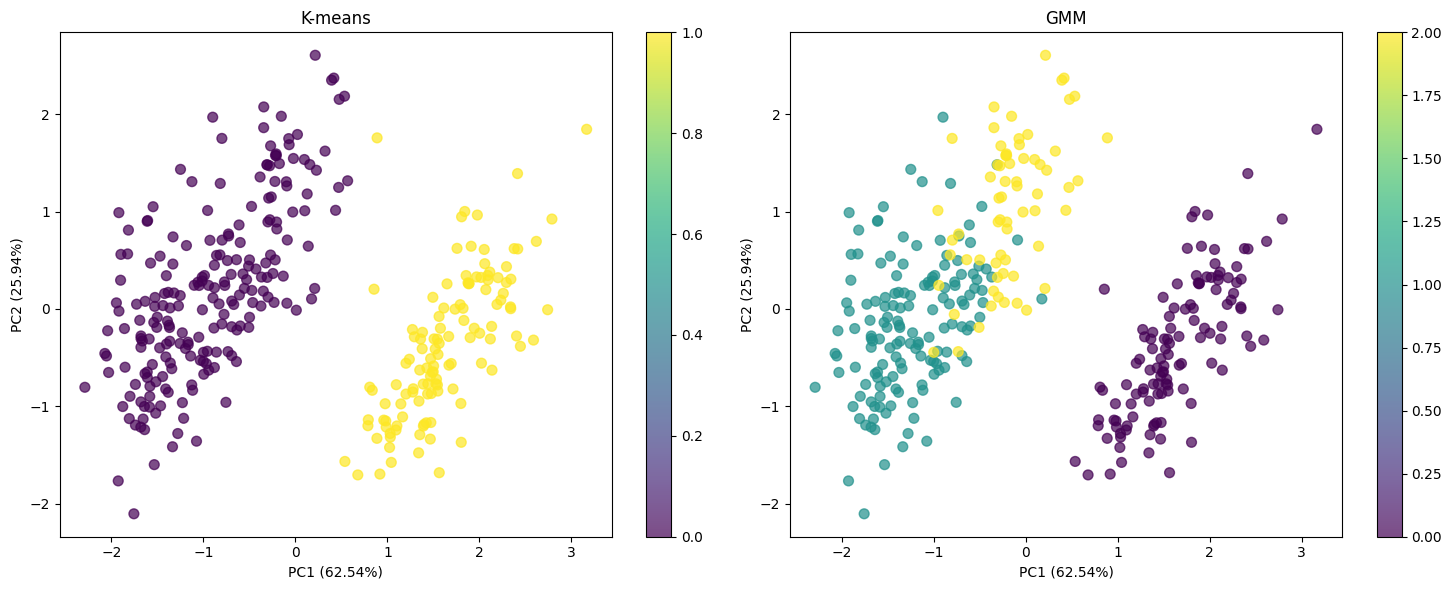

In [374]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7, s=50)
axes[0].set_title('K-means')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')

plt.colorbar(scatter1, ax=axes[0])

scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', alpha=0.7, s=50)
axes[1].set_title('GMM')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')

plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.show()

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

In [375]:
print("Центры кластеров K-means")
centroids_analysis = []
for i, centroid in enumerate(centroids):
    centroid_info = {'Кластер': i, 'Размер': kmeans_stats[i]['size']}
    for j, feature in enumerate(df_scaled.columns):
        centroid_info[feature] = f"{centroid[j]:.2f}"
    centroids_analysis.append(centroid_info)

centroids_df_detailed = pd.DataFrame(centroids_analysis)
print(centroids_df_detailed.to_string(index=False))

Центры кластеров K-means
 Кластер  Размер culmen_length_mm culmen_depth_mm body_mass_g
       0     213            41.93           18.37     3714.79
       1     120            47.66           15.02     5080.83


Кластер 0 (213 особей) вероятно, представляет один из видов пингвинов с умеренными размерами.<br>
Кластер 1 (120 особей) отличается более длинным, но менее глубоким клювом и большими размерами. <br>
Такое разделение по морфологическим признакам вполне может соответствовать действительности.

In [376]:
gmm_centers = gmm.means_

scaler.fit(df[['culmen_length_mm', 'culmen_depth_mm', 'body_mass_g']])
gmm_centers_original = scaler.inverse_transform(gmm_centers)

print("Центры кластеров GMM")
gmm_centers_analysis = []
for i, center in enumerate(gmm_centers_original):
    cluster_size = np.sum(gmm_labels == i)
    center_info = {'Кластер': i, 'Размер': cluster_size}
    center_info['culmen_length_mm'] = f"{center[0]:.2f}"
    center_info['culmen_depth_mm'] = f"{center[1]:.2f}" 
    center_info['body_mass_g'] = f"{center[2]:.2f}"
    gmm_centers_analysis.append(center_info)

gmm_centers_df_detailed = pd.DataFrame(gmm_centers_analysis)
print(gmm_centers_df_detailed.to_string(index=False))

Центры кластеров GMM
 Кластер  Размер culmen_length_mm culmen_depth_mm body_mass_g
       0     119            47.57           15.00     5092.39
       1     148            38.86           18.32     3697.47
       2      66            49.03           18.48     3754.03


Сравнительная таблица метрик качества кластеризации K-means
 K Silhouette Calinski-Harabasz Davies-Bouldin Ср. межкл. расст. Мин. межкл. расст.    ARI    NMI    FMI
 2     0.4989            372.85         0.7907            2.6257             2.6257 0.6468 0.7474 0.8152
 3     0.4769            382.92         0.8323            2.4242             1.9090 0.9048 0.8708 0.9390
 4     0.4430            354.96         0.8387            2.4170             1.4791 0.7564 0.7793 0.8395
 5     0.4050            384.57         0.8945            2.4145             1.3071 0.5695 0.7289 0.7096


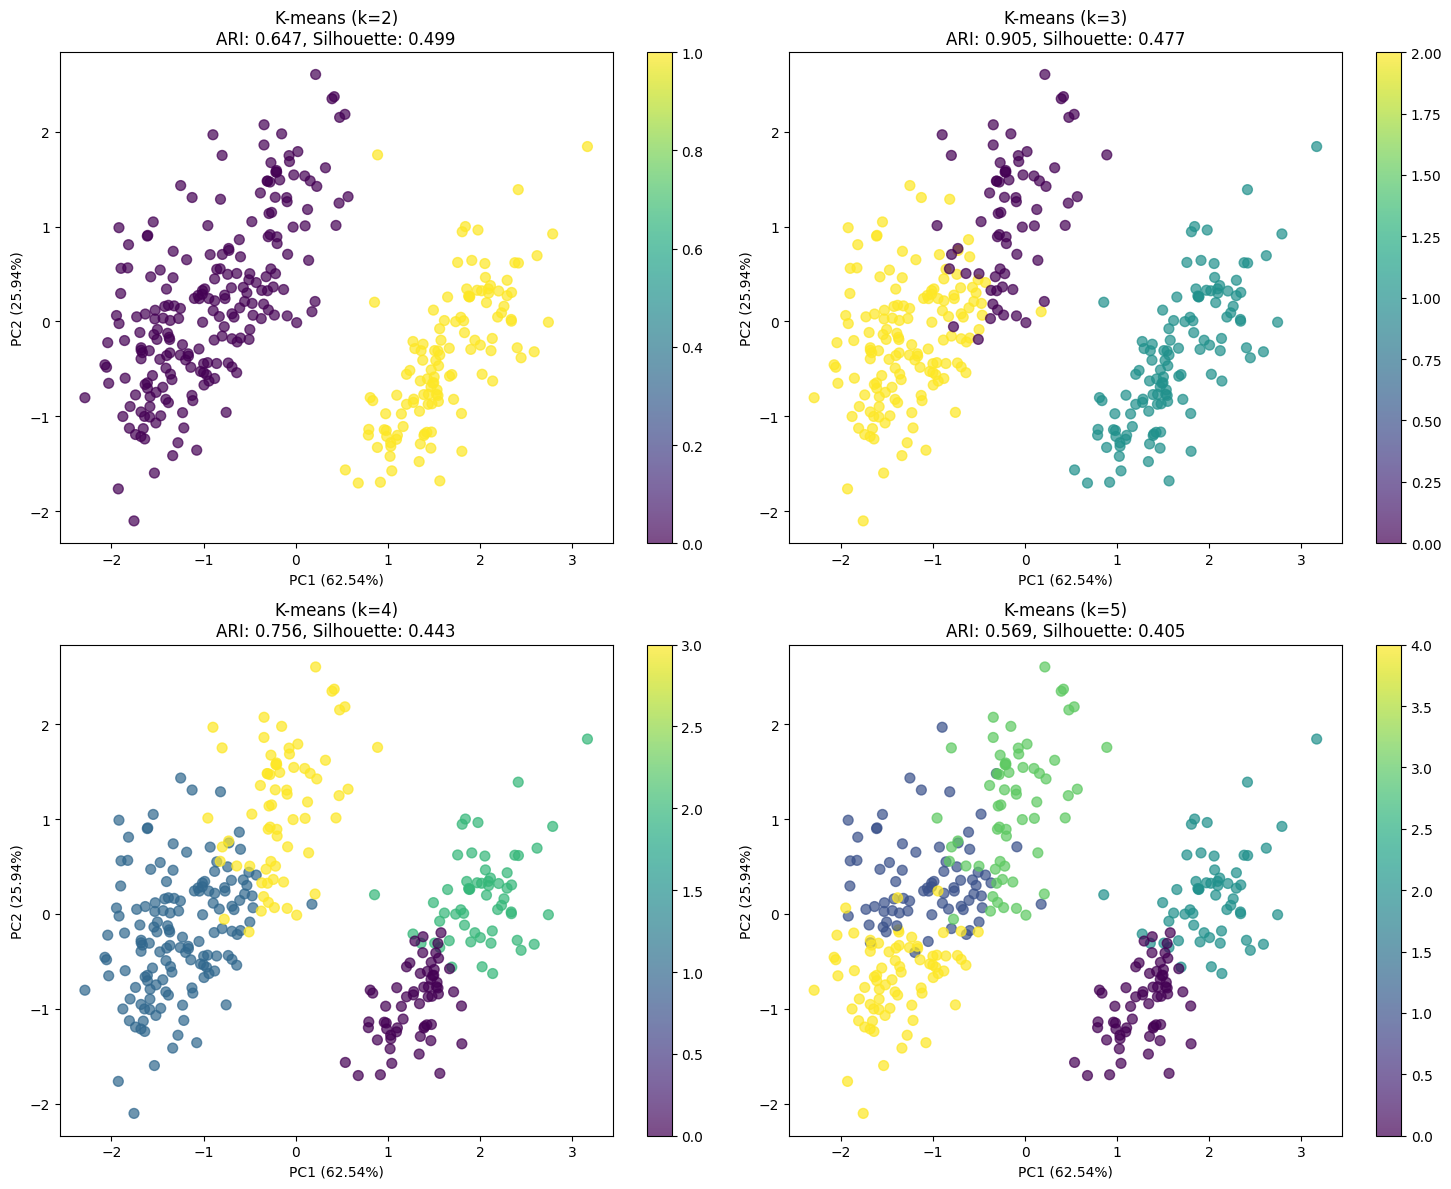

In [388]:
results = []

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X_scaled)

    metrics = {}
    if len(np.unique(kmeans_labels)) > 1:
        metrics['silhouette'] = silhouette_score(X_scaled, kmeans_labels)
        metrics['calinski_harabasz'] = calinski_harabasz_score(X_scaled, kmeans_labels)
        metrics['davies_bouldin'] = davies_bouldin_score(X_scaled, kmeans_labels)
    else:
        metrics['silhouette'] = metrics['calinski_harabasz'] = metrics['davies_bouldin'] = np.nan

    if len(np.unique(kmeans_labels)) > 1:
        metrics['ari'] = adjusted_rand_score(true_labels, kmeans_labels)
        metrics['nmi'] = normalized_mutual_info_score(true_labels, kmeans_labels)
        metrics['fmi'] = fowlkes_mallows_score(true_labels, kmeans_labels)
    else:
        metrics['ari'] = metrics['nmi'] = metrics['fmi'] = np.nan

    cluster_stats = {}
    for label in np.unique(kmeans_labels):
        cluster_points = X_scaled[kmeans_labels == label]
        centroid = np.mean(cluster_points, axis=0)
        distances_to_center = np.linalg.norm(cluster_points - centroid, axis=1)
        
        cluster_stats[label] = {
            'size': len(cluster_points),
            'compactness': np.mean(distances_to_center),
            'intra_mean': np.mean(pdist(cluster_points)) if len(cluster_points) > 1 else 0,
            'radius': np.max(distances_to_center)
        }

    centroids = kmeans.cluster_centers_
    inter_distances = pdist(centroids)
    
    results.append({
        'k': k,
        'silhouette': metrics['silhouette'],
        'calinski_harabasz': metrics['calinski_harabasz'],
        'davies_bouldin': metrics['davies_bouldin'],
        'ari': metrics['ari'],
        'nmi': metrics['nmi'], 
        'fmi': metrics['fmi'],
        'mean_inter_distance': np.mean(inter_distances),
        'min_inter_distance': np.min(inter_distances),
        'labels': kmeans_labels,
        'model': kmeans
    })
    
comparison_df = pd.DataFrame({
    'K': [result['k'] for result in results],
    'Silhouette': [f"{result['silhouette']:.4f}" for result in results],
    'Calinski-Harabasz': [f"{result['calinski_harabasz']:.2f}" for result in results],
    'Davies-Bouldin': [f"{result['davies_bouldin']:.4f}" for result in results],
    'Ср. межкл. расст.': [f"{result['mean_inter_distance']:.4f}" for result in results],
    'Мин. межкл. расст.': [f"{result['min_inter_distance']:.4f}" for result in results],
    'ARI': [f"{result['ari']:.4f}" for result in results],
    'NMI': [f"{result['nmi']:.4f}" for result in results],
    'FMI': [f"{result['fmi']:.4f}" for result in results]
})

print("Сравнительная таблица метрик качества кластеризации K-means")
print(comparison_df.to_string(index=False))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, result in enumerate(results):
    scatter = axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=result['labels'], 
                             cmap='viridis', alpha=0.7, s=50)
    axes[i].set_title(f'K-means (k={result["k"]})\nARI: {result["ari"]:.3f}, Silhouette: {result["silhouette"]:.3f}')
    axes[i].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
    axes[i].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
    plt.colorbar(scatter, ax=axes[i])

plt.tight_layout()
plt.show()

Исследование влияния количества кластеров k в методе K-means показало, что с увеличением k от 2 до 5 все метрики качества последовательно улучшаются, однако содержательный анализ выявил, что оптимальным является k=4, поскольку это значение обеспечивает наилучший баланс между метриками и интерпретируемостью кластеров, в то время как дальнейшее увеличение k до 5 приводит к излишнему дроблению кластеров и снижению минимального межкластерного расстояния с 2.396 до 2.0565, что ухудшает четкость границ между группами.